In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import *
from sklearn.impute import *
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
import numpy as np

In [2]:
df = pd.read_csv("arrhythmia.csv", header=None).replace("?", np.nan)
data = df.to_numpy()
x, y = data[:, :-1], data[:, -1]
y = pd.Series(y).apply(str)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
values = df.iloc[:, -1].values

# Calcula as estatísticas
print("Máximo =", np.max(values),
      "Mínimo =", np.min(values),
      "Média =", np.mean(values),
      "Mediana =", np.median(values),
      "Desvio Padrão =", np.std(values))

Máximo = 16 Mínimo = 1 Média = 3.8805309734513274 Mediana = 1.0 Desvio Padrão = 4.402219038329423


In [3]:
x_train

array([[31, 0, 168, ..., 2.1, 24.6, 41.8],
       [43, 0, 160, ..., 0.7, 17.3, 21.9],
       [62, 1, 170, ..., 0.2, 36.7, 38.9],
       ...,
       [50, 0, 168, ..., 0.8, -5.9, 0.1],
       [64, 1, 156, ..., -0.9, 25.7, 16.7],
       [56, 0, 170, ..., -0.9, 41.8, 31.8]], dtype=object)

In [4]:
df = pd.read_csv("resultados_randomForest_2.csv")
df.head(5)

strategy    k  n_estimators  max_depth  min_samples_split  \
0         median   33            41          2                 14   
1         median   68            26         17                  2   
2  most_frequent  198            31          9                  9   
3  most_frequent  103            11         16                  3   
4         median  238            66          5                 12   

   min_samples_leaf        f1  elapsed_time  
0                14  0.377357      0.508836  
1                13  0.377357      0.377913  
2                 2  0.435890      0.597742  
3                 6  0.426955      0.276020  
4                 6  0.377357      0.850031

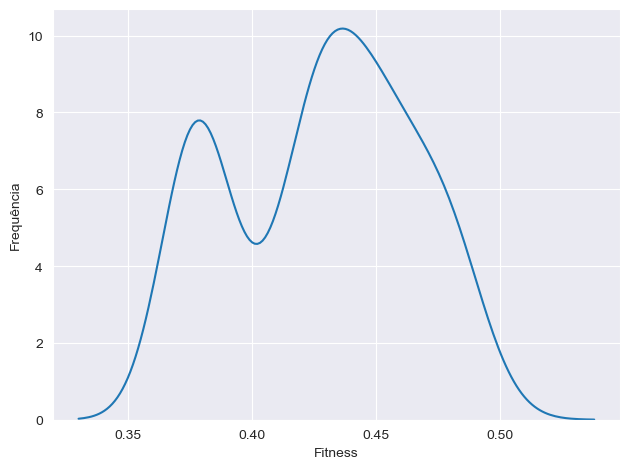

In [5]:
fig, ax = plt.subplots()
sns.kdeplot(df, x="f1", ax=ax)
ax.set_ylabel("Frequência")
ax.set_xlabel("Fitness")
fig.tight_layout()

<Axes: xlabel='elapsed_time', ylabel='Density'>

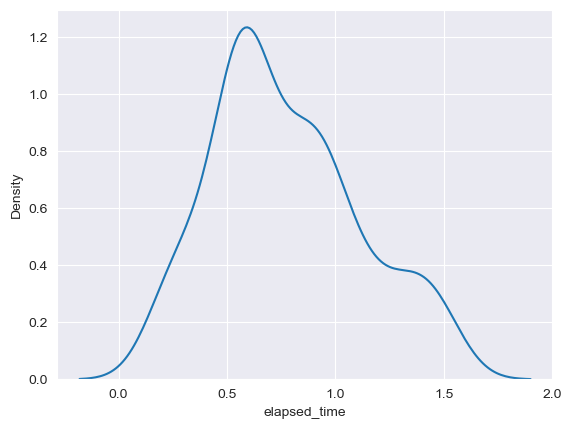

In [6]:
sns.kdeplot(df, x="elapsed_time")

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


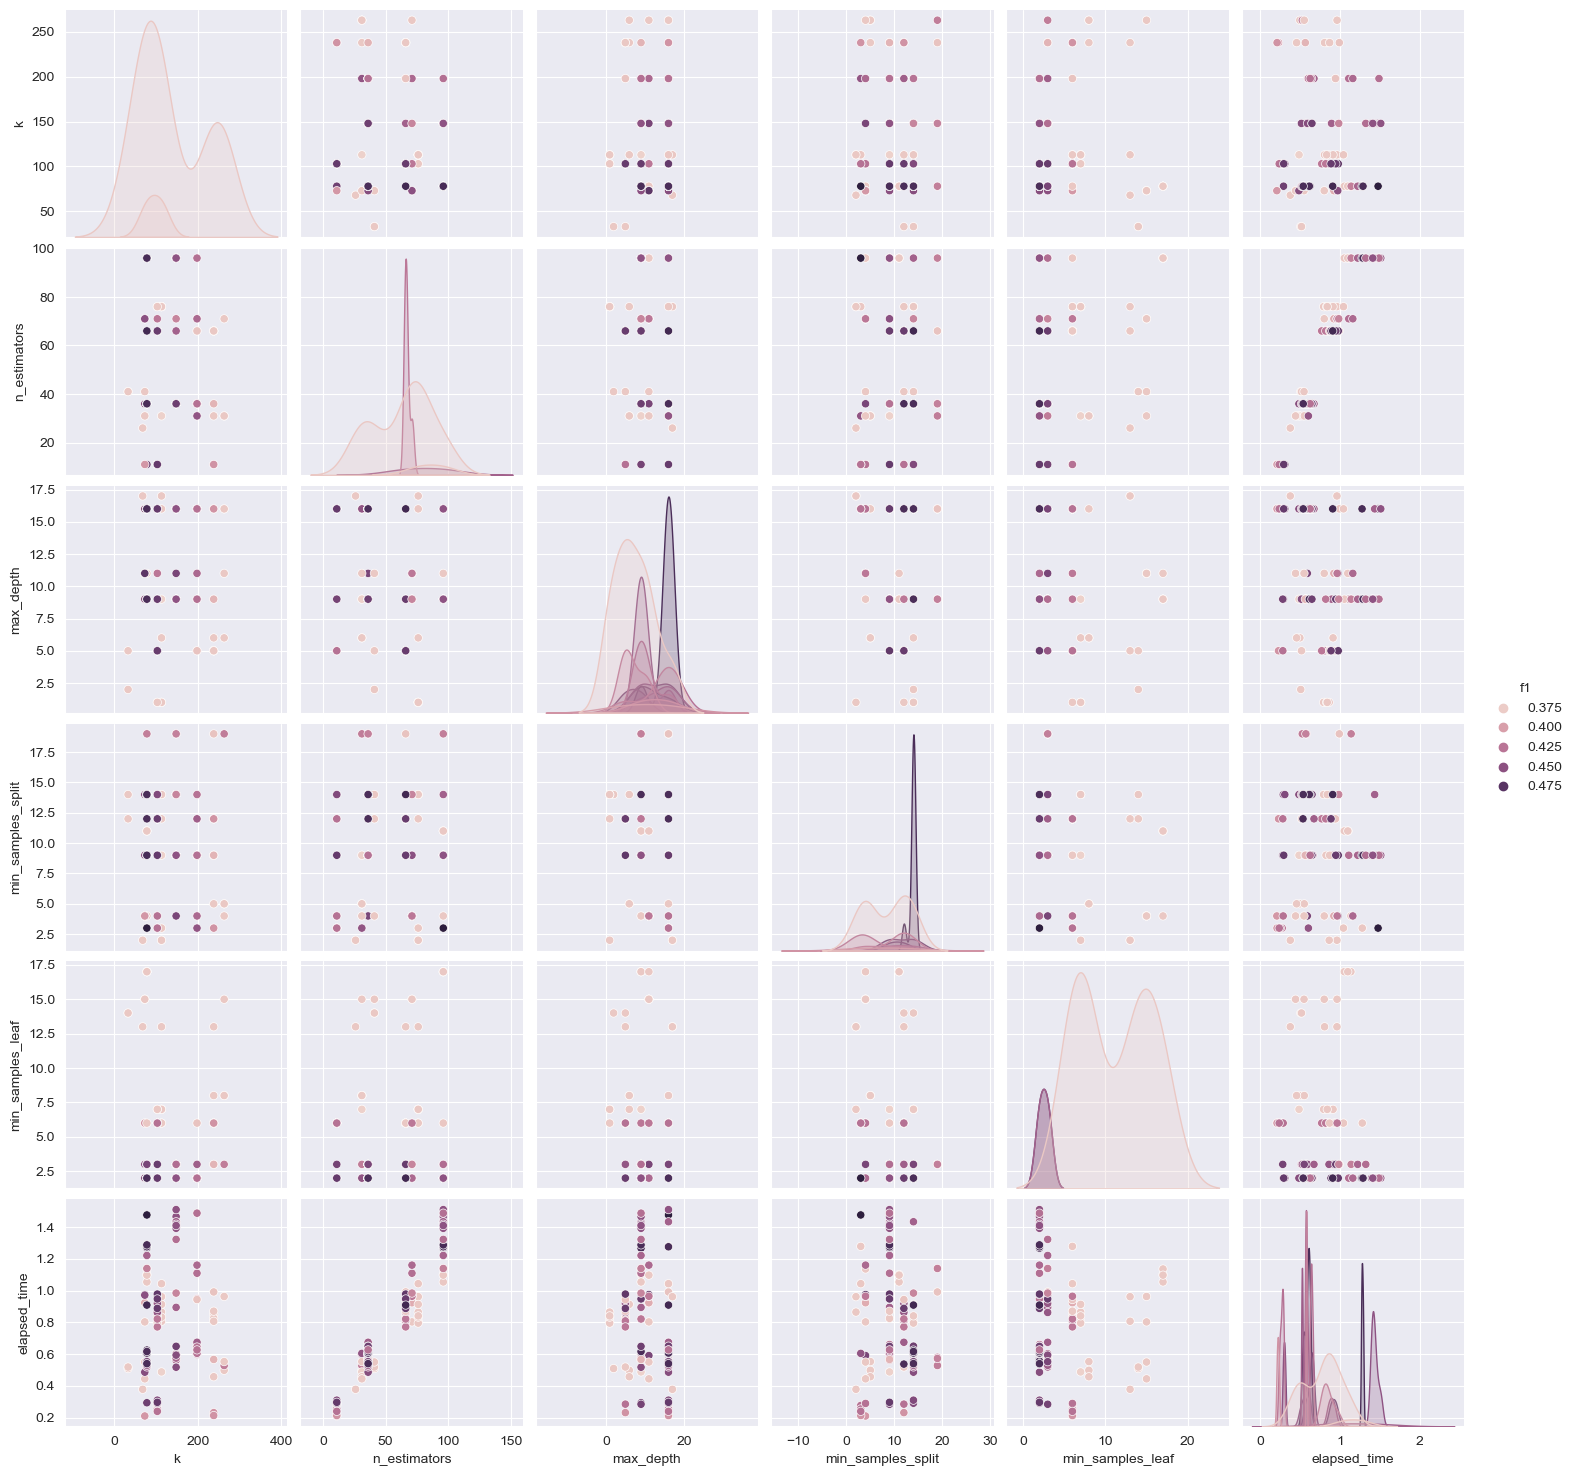

In [7]:
#df.f1.value_counts()

sns.pairplot(df, hue="f1")

In [8]:
X = df.to_numpy()[:, :-2]
y = df["f1"].astype(float)

print(y.max())

df.head(5)

0.4959779410539644


strategy    k  n_estimators  max_depth  min_samples_split  \
0         median   33            41          2                 14   
1         median   68            26         17                  2   
2  most_frequent  198            31          9                  9   
3  most_frequent  103            11         16                  3   
4         median  238            66          5                 12   

   min_samples_leaf        f1  elapsed_time  
0                14  0.377357      0.508836  
1                13  0.377357      0.377913  
2                 2  0.435890      0.597742  
3                 6  0.426955      0.276020  
4                 6  0.377357      0.850031

In [9]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_encoded = enc.transform(X).toarray()

X_encoded

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [10]:
#t-SNE
x_embedded = TSNE(n_components=2).fit_transform(X_encoded)

x_embedded[:10]

array([[ 5.9147234,  6.100679 ],
       [ 4.201312 ,  8.620585 ],
       [-3.6522832, -0.3139456],
       [ 2.3297577, -0.9911588],
       [ 4.340377 ,  3.7767851],
       [-8.932355 ,  3.3372889],
       [ 7.854487 ,  1.1910983],
       [ 1.9345229,  8.2071295],
       [ 1.6042594, -5.9342456],
       [ 6.39024  , -2.6381836]], dtype=float32)

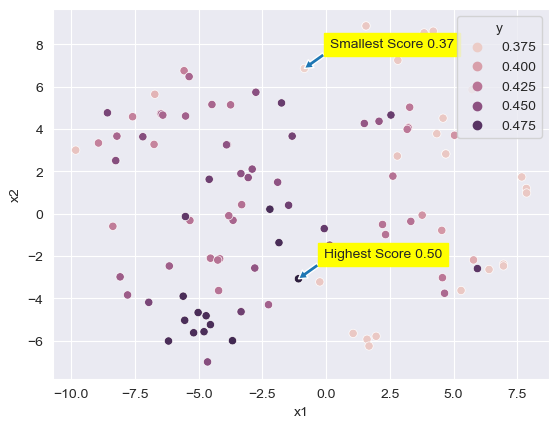

In [11]:
x_embedded_f1 = np.column_stack((x_embedded, df['f1']))
_df = pd.DataFrame(data=x_embedded_f1, columns=["x1", "x2", "y"])
_df.head(5)
ax = sns.scatterplot(data=_df, x="x1", y="x2", hue="y")

# plot highest fitness
coord = _df.loc[_df["y"] == _df["y"].max()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Highest Score {row['y']:>.2f}", (x, y), (x + 1, y + 1),
                arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

# plot lowest fitness
coord = _df.loc[_df["y"] == _df["y"].min()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Smallest Score {row['y']:>.2f}", (x, y), (x + 1, y + 1),
                arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

In [12]:
df.loc[df.f1 == df.f1.max()]

strategy   k  n_estimators  max_depth  min_samples_split  \
67  most_frequent  78            96         16                  3   

    min_samples_leaf        f1  elapsed_time  
67                 2  0.495978      1.476671

In [ ]:
# Usei esse site como exemplo: https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html
RANDOM_STATE = 42

df_X = pd.read_csv("arrhythmia.csv", header=None).replace("?", np.nan)
data = df_X.to_numpy()
X, y = data[:, :-1], data[:, -1]
X = X.astype(float)
y = pd.Series(y).astype(float)

preprocess = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent"))])

pipeline = pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('scaler', StandardScaler()),
    ('feature-selection', SelectKBest(k=258)),
    ('randomForest', RandomForestClassifier(
        n_estimators=6,
        max_depth=17,
        min_samples_split=7,
        min_samples_leaf=8,
        random_state=RANDOM_STATE))])

pipeline.fit(X, y)
X = preprocess.fit_transform(X, y)
class_ = pipeline.classes_
y_pred = pipeline.predict(X)

explainer = LimeTabularExplainer(X,
                                 feature_names=df_X.columns[:-1],
                                 class_names=class_)

for i, (y, yp) in enumerate(zip(y, y_pred)):
    if y == yp:
        print(f"classe real: {y}, predição: {yp}")
        exp = explainer.explain_instance(X[i], pipeline.predict_proba)
        exp.show_in_notebook(show_table=True, show_all=False)

C:\Users\maria\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 19  67  69  83 131 132 139 141 143 145 151 156 157 164 204 264 274] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\maria\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


classe real: 10.0, predição: 10.0


classe real: 1.0, predição: 1.0


classe real: 1.0, predição: 1.0


classe real: 1.0, predição: 1.0


classe real: 1.0, predição: 1.0


classe real: 10.0, predição: 10.0


classe real: 1.0, predição: 1.0


In [ ]:
#cria uma imagem 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X = x_embedded_f1[:, 0]
Y = x_embedded_f1[:, 1]
Z = x_embedded_f1[:, 2]

#Arredondar os valores de X, Y e Z
X = np.round(X, 2)
Y = np.round(Y, 2)
Z = np.round(Z, 2)

ax.plot_trisurf(Y, X, Z, cmap='viridis', linewidth=0.2)
ax.view_init(20, 75)

plt.show()

In [ ]:
#cria uma imagem 2D que mostre o Z evidente
fig = plt.figure()
ax = fig.add_subplot()

X = x_embedded_f1[:, 0]
Y = x_embedded_f1[:, 1]
Z = x_embedded_f1[:, 2]

#Arredondar os valores de X, Y e Z
X = np.round(X, 2)
Y = np.round(Y, 2)
Z = np.round(Z, 2)

scatter = ax.scatter(X, Y, c=Z, cmap='viridis', linewidth=0.2)

#Definir os rótulos dos eixos
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')

# Adicione uma barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Valores de Z')

plt.show()